In [32]:
%cd ../

/home/akali/projects


In [33]:
import importlib
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from model_trainer import loader
from model_trainer.config import get_path

log = logging.getLogger(__name__)
importlib.reload(loader)

<module 'model_trainer.loader' from '/projects/model-trainer/model_trainer/loader.py'>

In [34]:
corpus_name = "wiki-he"
cbow_path = get_path(corpus_name, "cbow.kv")
cbow_model = loader.load_kv(cbow_path)

sg_path = get_path(corpus_name, "sg.kv")
sg_model = loader.load_kv(sg_path)

ft_path = get_path(corpus_name, "fasttext.kv")
ft_model = loader.load_kv(ft_path)

[23:33:07] loading KeyedVectors object from ./data/wiki-he/cbow.kv [gensim.utils]


FileNotFoundError: [Errno 2] No such file or directory: './data/wiki-he/cbow.kv'

In [ ]:
cbow_vocab = set(cbow_model.key_to_index.keys())
sg_vocab = set(sg_model.key_to_index.keys())
ft_vocab = set(ft_model.key_to_index.keys())
common_vocab = cbow_vocab.intersection(sg_vocab).intersection(ft_vocab)

s1, s2, s3 = len(cbow_vocab),  len(sg_vocab), len(ft_vocab)
print(f"Common vocab: {len(common_vocab)}")

In [39]:
import random

representative = "אקדח"  # random.sample(common_vocab, k=1)[0]
print(f"Representative: {representative}")

others_count = 10000
random.seed(3)
others = random.sample(common_vocab, k=others_count)
print(f"Others: {others}")

Representative: אקדח
Others: ['יורובייצקה', 'קוראב', 'ועכבות', 'ואלפבית', 'והסגוליות', 'לסמר', 'eam', 'מילישניות', 'הספלאש', 'והומוריסטן', 'אגאלינה', 'דמיטרוב', 'ללרנקה', 'אטריום', 'גרעינים', 'חקוקה', 'ופוסל', 'וקמורות', 'שציורו', 'הקונגה', 'nuummioq', 'וכניעת', 'לגול', 'שבטיחות', 'מורואה', 'מקריאתו', 'קרפדיים', 'המתסיס', 'מורטאיה', 'בססנה', 'שנטענו', 'ענניו', 'לרומת', 'להסתננות', 'לאופים', 'ברקתו', 'רומיל', 'הירוגליפית', 'authorized', 'ינשופה', 'ומאהבת', 'ediția', 'רפורטר', 'פרפקציוניסטים', 'בברוקר', 'במתחם', 'אמיתתו', 'מבדיחותיו', 'וצועקת', 'צוקרי', 'מתצפיות', 'תמסחן', 'boolean', 'bárdos', 'dummer', 'קונרוי', 'בסטארק', 'בארגנטינה', 'daher', 'פחמימניות', 'nachrichtenbüro', 'חוטורסקי', 'בכיכובה', 'צמנטים', 'ווסטקואסטר', 'רהאל', 'buttresses', 'תבונות', 'לרוטנברג', 'הסימקה', 'פפרקורן', 'שבמוות', 'אלפונז', 'הקסטיליאנית', 'singulier', 'דירנט', 'קאראמלו', 'קוטרוצ', 'ilomilo', 'סקטוריאלית', 'כלשהן', 'שהספינקס', 'אסאנו', 'preterm', 'מייסר', 'זיובל', 'אירייז', 'לקציצת', 'שחדשות', 'סמוצבטי', 'c

In [40]:
from typing import List
from gensim.models import KeyedVectors


def representative_distances(model: KeyedVectors, representative: str, others: List[str]) -> np.ndarray:
    return model.distances(representative, other_words=others)


cbow_distances = representative_distances(cbow_model, representative, others)
sg_distances = representative_distances(sg_model, representative, others)
ft_distances = representative_distances(ft_model, representative, others)

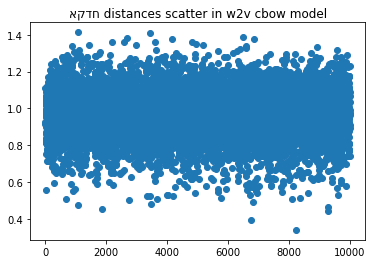

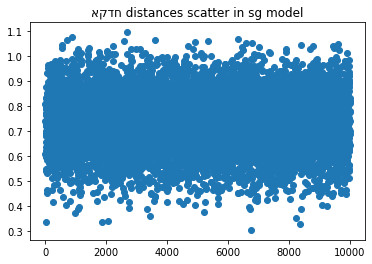

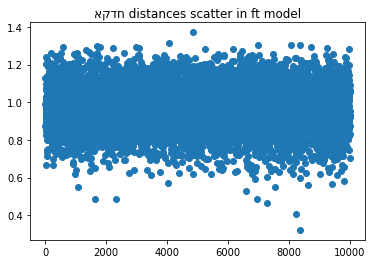

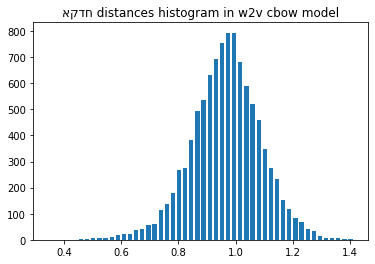

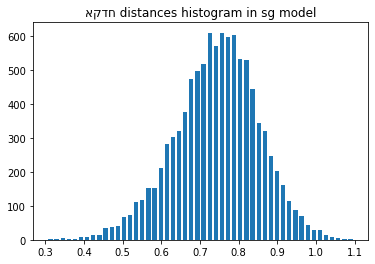

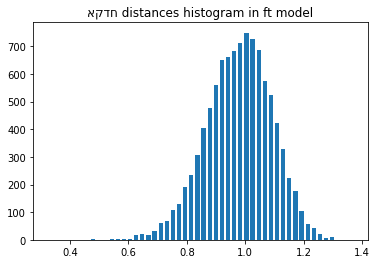

<Figure size 432x288 with 0 Axes>

In [41]:
def draw_distances_scatter(distances: np.ndarray, representative: str = None, model_name: str = None):
    x = np.arange(len(distances))
    plt.scatter(x, distances)
    if representative:
        title = f"{representative} distances scatter"
        if model_name:
            title += f" in {model_name} model"
        plt.title(title)
    plt.show()
    plt.clf()


def draw_distances_histogram(
    distances: np.ndarray, bins: int = None, representative: str = None, model_name: str = None
):
    if bins is None:
        bins = min(int(len(distances) / 10), 50)
    plt.hist(distances, bins=bins, rwidth=0.7)
    if representative:
        title = f"{representative} distances histogram"
        if model_name:
            title += f" in {model_name} model"
        plt.title(title)
    plt.show()
    plt.clf()


draw_distances_scatter(cbow_distances, representative=representative, model_name="w2v cbow")
draw_distances_scatter(sg_distances, representative=representative, model_name="sg")
draw_distances_scatter(ft_distances, representative=representative, model_name="ft")
draw_distances_histogram(cbow_distances, representative=representative, model_name="w2v cbow")
draw_distances_histogram(sg_distances, representative=representative, model_name="sg")
draw_distances_histogram(ft_distances, representative=representative, model_name="ft")

In [42]:
def edges(distances: np.ndarray, others: List[str], top_n: int = 15) -> List[str]:
    indexes = np.argsort(distances)[:top_n]
    return [others[i] for i in indexes]


print(f"For representative: {representative}")
edges1 = edges(cbow_distances, others=others)
edges2 = edges(sg_distances, others=others)
edges3 = edges(ft_distances, others=others)

df = pd.DataFrame()
df["w2v"] = edges1
df["sg"] = edges2
df["ft"] = edges3

print(df)

For representative: אקדח
          w2v       sg      ft
0        גרזן     ההדק  שאקדחו
1        ההדק   שאקדחו    גרזן
2      פיתיון    ברקתו     קלש
3      אזיקים   אזיקים    קטטר
4   המיקרופון  מתרמילו   רובוק
5        במקל     גרזן  מתנייד
6     סטרייקר    באזנו   תותחן
7       תלייה    בבריח    במקל
8     הקליעים  וארטולו    שטנק
9      שהושלך   פגיונו   דדשוט
10       בתאו   התכופף     חבט
11        sws     במקל  רוגופס
12     שאקדחו    לרכבו   מחשוד
13    מזוודות  הקליעים  מברזנט
14     פגיונו     כייס   המחבק
